# Wk4_Exercises_self_study (with solutions)

Before you start, first import the pandas, NumPy, matplotlib, seaborn, SciPy and statsmodels libraries, for example as follows:
```python
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
```

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

__Introduction:__ A substantial body of research has studied the determinants of CEO compensation. The following series of questions are loosely based on a recent paper by Bouteska and Mefteh-Wali (2021, *JAAR*). Similar to them, you will examine to what extent CEO power and firm performance (in terms of ROA and Tobin's Q) are related to CEO pay, controlling for several firm characteristics (firm size, leverage, and sector).

To do so, you will use two datasets that are provided on Canvas as Excel files ('comp_regr.xlsx' and 'exec_regr.xlsx'). These Excel files contain the necessary information and are collected using Compustat - Capital IQ. More specifically, these datasets contain data for the index constituents of the S&P 1500 list (on December 31, 2020) for the fiscal year 2019.

__Q1:__ Use the `read_excel()` method to import the Excel file 'comp_regr.xlsx' as a pandas DataFrame ('df_comp'). Next, in a separate cell, display general information about this dataset using the `info()` method.

In [2]:
# Import the first dataset

df_comp = pd.read_excel('data/comp_regr.xlsx')
df_comp

,Global Company Key,Data Year - Fiscal,Ticker Symbol,Company Name,Assets - Total,Common/Ordinary Equity - Total,Common Shares Outstanding,Debt in Current Liabilities - Total,Long-Term Debt - Total,Net Income (Loss),Price Close - Annual - Fiscal,Standard Industry Classification Code
0,1004,2019,AIR,AAR CORP,2079.000,902.600,35.097,13.700,670.900,4.400,20.17,5080
1,1045,2019,AAL,AMERICAN AIRLINES GROUP INC,59995.000,-118.000,428.203,4569.000,28875.000,1686.000,28.68,4512
2,1075,2019,PNW,PINNACLE WEST CAPITAL CORP,18479.247,5430.648,112.436,927.388,4884.430,538.320,89.93,4911
3,1076,2019,PRG,PROG HOLDINGS INC,3297.800,1737.259,66.718,83.886,626.530,31.472,57.11,6141
4,1078,2019,ABT,ABBOTT LABORATORIES,67887.000,31088.000,1762.503,1683.000,17416.000,3687.000,86.86,3845
...,...,...,...,...,...,...,...,...,...,...,...,...
1470,294524,2019,LYB,LYONDELLBASELL INDUSTRIES NV,30435.000,8044.000,333.477,721.000,12830.000,3390.000,94.48,2820
1471,316056,2019,ALLE,ALLEGION PLC,2967.200,757.400,92.724,25.900,1483.200,401.800,124.54,3420
1472,317264,2019,LPG,DORIAN LPG LTD,1671.960,977.052,50.828,62.269,599.571,111.841,8.71,4412
1473,326688,2019,NVT,NVENT ELECTRIC PLC,4640.300,2592.500,169.493,32.200,1080.800,222.700,25.58,3440


In [3]:
# Display general information

df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Global Company Key                     1475 non-null   int64  
 1   Data Year - Fiscal                     1475 non-null   int64  
 2   Ticker Symbol                          1475 non-null   object 
 3   Company Name                           1475 non-null   object 
 4   Assets - Total                         1475 non-null   float64
 5   Common/Ordinary Equity - Total         1475 non-null   float64
 6   Common Shares Outstanding              1470 non-null   float64
 7   Debt in Current Liabilities - Total    1475 non-null   float64
 8   Long-Term Debt - Total                 1471 non-null   float64
 9   Net Income (Loss)                      1475 non-null   float64
 10  Price Close - Annual - Fiscal          1468 non-null   float64
 11  Stan

__Q2:__ Remove all financial institutions (SIC: 6000–6999) and regulated industries (SIC: 4900–4999).

In [4]:
# Remove financial institutions and regulated industries

df_comp = df_comp[(df_comp['Standard Industry Classification Code'] < 4900) |
                  (df_comp['Standard Industry Classification Code'] > 4999)]
df_comp = df_comp[(df_comp['Standard Industry Classification Code'] < 6000) |
                  (df_comp['Standard Industry Classification Code'] > 6999)]
df_comp

,Global Company Key,Data Year - Fiscal,Ticker Symbol,Company Name,Assets - Total,Common/Ordinary Equity - Total,Common Shares Outstanding,Debt in Current Liabilities - Total,Long-Term Debt - Total,Net Income (Loss),Price Close - Annual - Fiscal,Standard Industry Classification Code
0,1004,2019,AIR,AAR CORP,2079.00,902.600,35.097,13.700,670.900,4.400,20.17,5080
1,1045,2019,AAL,AMERICAN AIRLINES GROUP INC,59995.00,-118.000,428.203,4569.000,28875.000,1686.000,28.68,4512
4,1078,2019,ABT,ABBOTT LABORATORIES,67887.00,31088.000,1762.503,1683.000,17416.000,3687.000,86.86,3845
5,1161,2019,AMD,ADVANCED MICRO DEVICES,6028.00,2827.000,1170.000,43.000,685.000,341.000,45.86,3674
6,1209,2019,APD,AIR PRODUCTS & CHEMICALS INC,18942.80,11053.600,220.415,98.600,3227.400,1760.000,221.86,2810
...,...,...,...,...,...,...,...,...,...,...,...,...
1470,294524,2019,LYB,LYONDELLBASELL INDUSTRIES NV,30435.00,8044.000,333.477,721.000,12830.000,3390.000,94.48,2820
1471,316056,2019,ALLE,ALLEGION PLC,2967.20,757.400,92.724,25.900,1483.200,401.800,124.54,3420
1472,317264,2019,LPG,DORIAN LPG LTD,1671.96,977.052,50.828,62.269,599.571,111.841,8.71,4412
1473,326688,2019,NVT,NVENT ELECTRIC PLC,4640.30,2592.500,169.493,32.200,1080.800,222.700,25.58,3440


__Q3:__ Create two new variables ('ROA' and 'Tobin_Q') that reflect two widely used firm performance measures, namely return on assets (ROA) and Tobin's Q. Create the 'ROA' variable by dividing net income ('Net Income (Loss)') by total assets ('Assets - Total'). Create the 'Tobin_Q' variable by using the following formula: __(AT + (CSHO * PRCC_F) - CEQ) / AT__, where AT is 'Assets - Total', CSHO is 'Common Shares Outstanding', PRCC_F is 'Price Close - Annual - Fiscal', and CEQ is 'Common/Ordinary Equity - Total'.

In [5]:
# Create two new variables ('ROA' and 'Tobin_Q')

df_comp['ROA'] = df_comp['Net Income (Loss)'] / df_comp['Assets - Total']
df_comp['Tobin_Q'] = (df_comp['Assets - Total'] + (df_comp['Common Shares Outstanding'] * \
                       df_comp['Price Close - Annual - Fiscal']) - df_comp['Common/Ordinary Equity - Total']) / \
                       df_comp['Assets - Total']
df_comp

,Global Company Key,Data Year - Fiscal,Ticker Symbol,Company Name,Assets - Total,Common/Ordinary Equity - Total,Common Shares Outstanding,Debt in Current Liabilities - Total,Long-Term Debt - Total,Net Income (Loss),Price Close - Annual - Fiscal,Standard Industry Classification Code,ROA,Tobin_Q
0,1004,2019,AIR,AAR CORP,2079.00,902.600,35.097,13.700,670.900,4.400,20.17,5080,0.002116,0.906352
1,1045,2019,AAL,AMERICAN AIRLINES GROUP INC,59995.00,-118.000,428.203,4569.000,28875.000,1686.000,28.68,4512,0.028102,1.206665
4,1078,2019,ABT,ABBOTT LABORATORIES,67887.00,31088.000,1762.503,1683.000,17416.000,3687.000,86.86,3845,0.054311,2.797148
5,1161,2019,AMD,ADVANCED MICRO DEVICES,6028.00,2827.000,1170.000,43.000,685.000,341.000,45.86,3674,0.056569,9.432183
6,1209,2019,APD,AIR PRODUCTS & CHEMICALS INC,18942.80,11053.600,220.415,98.600,3227.400,1760.000,221.86,2810,0.092911,2.997998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,294524,2019,LYB,LYONDELLBASELL INDUSTRIES NV,30435.00,8044.000,333.477,721.000,12830.000,3390.000,94.48,2820,0.111385,1.770919
1471,316056,2019,ALLE,ALLEGION PLC,2967.20,757.400,92.724,25.900,1483.200,401.800,124.54,3420,0.135414,4.636576
1472,317264,2019,LPG,DORIAN LPG LTD,1671.96,977.052,50.828,62.269,599.571,111.841,8.71,4412,0.066892,0.680411
1473,326688,2019,NVT,NVENT ELECTRIC PLC,4640.30,2592.500,169.493,32.200,1080.800,222.700,25.58,3440,0.047993,1.375650


__Q4:__ Create three new variables ('Firm_size', 'Leverage' and 'Sector') that reflect the three control variables, namely firm size, leverage, and whether a firm operates in a manufacturing industry (SIC codes: 2000-3999) or not (other SIC codes). Create the 'Firm_size' variable by taking the natural logarithm of total assets ('Assets - Total'). Create the 'Leverage' variable by adding long-term debt ('Long-Term Debt - Total') and short-term debt ('Debt in Current Liabilities - Total'), and dividing this by total assets ('Assets - Total'). Create the 'Sector' variable by creating a dummy variable that is equal to 1 if a firm operates in a manufacturing industry (SIC codes: 2000-3999) and 0 if it operates in a non-manufacturing industry (other SIC codes).

In [6]:
# Create three new variables ('Firm_size', 'Leverage' and 'Sector')

df_comp['Firm_size'] = np.log(df_comp['Assets - Total'])
df_comp['Leverage'] = (df_comp['Long-Term Debt - Total'] + df_comp['Debt in Current Liabilities - Total']) / df_comp['Assets - Total']
df_comp['Sector'] = np.where((df_comp['Standard Industry Classification Code'] >= 2000) & (df_comp['Standard Industry Classification Code'] <= 3999), 1, 0)
df_comp

,Global Company Key,Data Year - Fiscal,Ticker Symbol,Company Name,Assets - Total,Common/Ordinary Equity - Total,Common Shares Outstanding,Debt in Current Liabilities - Total,Long-Term Debt - Total,Net Income (Loss),Price Close - Annual - Fiscal,Standard Industry Classification Code,ROA,Tobin_Q,Firm_size,Leverage,Sector
0,1004,2019,AIR,AAR CORP,2079.00,902.600,35.097,13.700,670.900,4.400,20.17,5080,0.002116,0.906352,7.639642,0.329293,0
1,1045,2019,AAL,AMERICAN AIRLINES GROUP INC,59995.00,-118.000,428.203,4569.000,28875.000,1686.000,28.68,4512,0.028102,1.206665,11.002017,0.557446,0
4,1078,2019,ABT,ABBOTT LABORATORIES,67887.00,31088.000,1762.503,1683.000,17416.000,3687.000,86.86,3845,0.054311,2.797148,11.125600,0.281335,1
5,1161,2019,AMD,ADVANCED MICRO DEVICES,6028.00,2827.000,1170.000,43.000,685.000,341.000,45.86,3674,0.056569,9.432183,8.704171,0.120770,1
6,1209,2019,APD,AIR PRODUCTS & CHEMICALS INC,18942.80,11053.600,220.415,98.600,3227.400,1760.000,221.86,2810,0.092911,2.997998,9.849179,0.175581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,294524,2019,LYB,LYONDELLBASELL INDUSTRIES NV,30435.00,8044.000,333.477,721.000,12830.000,3390.000,94.48,2820,0.111385,1.770919,10.323349,0.445244,1
1471,316056,2019,ALLE,ALLEGION PLC,2967.20,757.400,92.724,25.900,1483.200,401.800,124.54,3420,0.135414,4.636576,7.995374,0.508594,1
1472,317264,2019,LPG,DORIAN LPG LTD,1671.96,977.052,50.828,62.269,599.571,111.841,8.71,4412,0.066892,0.680411,7.421752,0.395847,0
1473,326688,2019,NVT,NVENT ELECTRIC PLC,4640.30,2592.500,169.493,32.200,1080.800,222.700,25.58,3440,0.047993,1.375650,8.442534,0.239855,1


__Q5:__ Drop all columns from the DataFrame, except 'Ticker Symbol', 'ROA', 'Tobin_Q', 'Firm_size', 'Leverage' and 'Sector'.

In [7]:
# Drop all unnecessary columns

df_comp = df_comp[['Ticker Symbol', 'ROA', 'Tobin_Q', 'Firm_size', 'Leverage', 'Sector']]
df_comp

,Ticker Symbol,ROA,Tobin_Q,Firm_size,Leverage,Sector
0,AIR,0.002116,0.906352,7.639642,0.329293,0
1,AAL,0.028102,1.206665,11.002017,0.557446,0
4,ABT,0.054311,2.797148,11.125600,0.281335,1
5,AMD,0.056569,9.432183,8.704171,0.120770,1
6,APD,0.092911,2.997998,9.849179,0.175581,1
...,...,...,...,...,...,...
1470,LYB,0.111385,1.770919,10.323349,0.445244,1
1471,ALLE,0.135414,4.636576,7.995374,0.508594,1
1472,LPG,0.066892,0.680411,7.421752,0.395847,0
1473,NVT,0.047993,1.375650,8.442534,0.239855,1


__Q6:__ Use the `read_excel()` method to import the Excel file 'exec_regr.xlsx' as a pandas DataFrame ('df_exec'). Next, in a separate cell, display general information about this dataset using the `info()` method.

In [8]:
# Import the second dataset

df_exec = pd.read_excel('data/exec_regr.xlsx')
df_exec

,Executive served as a director during the fiscal year,Company Name,Annual CEO Flag,Salary ($),Bonus ($),Shares Owned - As Reported,Executive's Age,Company ID Number,Fiscal Year,Ticker Symbol,SIC Code,Year Became CEO
0,0,AAR CORP,NaN,248.596,0.0,342.951,62.0,1004,2019,AIR,5080,NaT
1,1,AAR CORP,CEO,801.101,0.0,475.971,43.0,1004,2019,AIR,5080,2018
2,0,AAR CORP,NaN,327.843,50.0,39.000,47.0,1004,2019,AIR,5080,NaT
3,0,AAR CORP,NaN,403.498,0.0,35.629,34.0,1004,2019,AIR,5080,NaT
4,0,AAR CORP,NaN,391.746,0.0,67.183,42.0,1004,2019,AIR,5080,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
7937,0,ARCOSA INC,NaN,400.000,62.5,11.383,38.0,328795,2019,ACA,3440,NaT
7938,0,ARCOSA INC,NaN,350.000,0.0,8.424,37.0,328795,2019,ACA,3440,NaT
7939,0,ARCOSA INC,NaN,440.000,0.0,13.540,50.0,328795,2019,ACA,3440,NaT
7940,0,ARCOSA INC,NaN,355.844,0.0,4.643,53.0,328795,2019,ACA,3440,NaT


In [9]:
# Display general information

df_exec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7942 entries, 0 to 7941
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Executive served as a director during the fiscal year  7942 non-null   int64  
 1   Company Name                                           7942 non-null   object 
 2   Annual CEO Flag                                        1481 non-null   object 
 3   Salary ($)                                             7942 non-null   float64
 4   Bonus ($)                                              7942 non-null   float64
 5   Shares Owned - As Reported                             7751 non-null   float64
 6   Executive's Age                                        7901 non-null   float64
 7   Company ID Number                                      7942 non-null   int64  
 8   Fiscal Year                                     

__Q7:__ Remove all financial institutions (SIC: 6000–6999) and regulated industries (SIC: 4900–4999).

In [10]:
# Remove financial institutions and regulated industries

df_exec = df_exec[(df_exec['SIC Code'] < 4900) |
                  (df_exec['SIC Code'] > 4999)]
df_exec = df_exec[(df_exec['SIC Code'] < 6000) |
                  (df_exec['SIC Code'] > 6999)]
df_exec

,Executive served as a director during the fiscal year,Company Name,Annual CEO Flag,Salary ($),Bonus ($),Shares Owned - As Reported,Executive's Age,Company ID Number,Fiscal Year,Ticker Symbol,SIC Code,Year Became CEO
0,0,AAR CORP,NaN,248.596,0.0,342.951,62.0,1004,2019,AIR,5080,NaT
1,1,AAR CORP,CEO,801.101,0.0,475.971,43.0,1004,2019,AIR,5080,2018
2,0,AAR CORP,NaN,327.843,50.0,39.000,47.0,1004,2019,AIR,5080,NaT
3,0,AAR CORP,NaN,403.498,0.0,35.629,34.0,1004,2019,AIR,5080,NaT
4,0,AAR CORP,NaN,391.746,0.0,67.183,42.0,1004,2019,AIR,5080,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
7937,0,ARCOSA INC,NaN,400.000,62.5,11.383,38.0,328795,2019,ACA,3440,NaT
7938,0,ARCOSA INC,NaN,350.000,0.0,8.424,37.0,328795,2019,ACA,3440,NaT
7939,0,ARCOSA INC,NaN,440.000,0.0,13.540,50.0,328795,2019,ACA,3440,NaT
7940,0,ARCOSA INC,NaN,355.844,0.0,4.643,53.0,328795,2019,ACA,3440,NaT


__Q8:__ Perform the following three operations on the 'df_exec' DateFrame: (a) create a new variable ('shares - TMT') that is equal to the total amount of owned shares (as reported) of the whole top management team (using the `groupby()` and `transform(sum)` methods), (b) create a new variable ('ratio of shares') by dividing the amount of owned shares (as reported) of an individual top manager ('Shares Owned - As Reported') by the total amount of owned shares (as reported) of the whole top management team ('shares - TMT'), and (c) select only the rows where the 'Annual CEO Flag' is equal to 'CEO'.

In [11]:
# Create two new variables ('shares - TMT' and 'ratio of shares'), and select the CEO rows

df_exec['shares - TMT'] = df_exec.groupby('Ticker Symbol')['Shares Owned - As Reported'].transform(sum)
df_exec['ratio of shares'] = df_exec['Shares Owned - As Reported'] / df_exec['shares - TMT']
df_exec = df_exec[(df_exec['Annual CEO Flag'] == 'CEO')]
df_exec

,Executive served as a director during the fiscal year,Company Name,Annual CEO Flag,Salary ($),Bonus ($),Shares Owned - As Reported,Executive's Age,Company ID Number,Fiscal Year,Ticker Symbol,SIC Code,Year Became CEO,shares - TMT,ratio of shares
1,1,AAR CORP,CEO,801.101,0.0,475.971,43.0,1004,2019,AIR,5080,2018,973.934,0.488710
8,1,AMERICAN AIRLINES GROUP INC,CEO,0.000,0.0,2522.151,57.0,1045,2019,AAL,4512,2013,5124.703,0.492156
22,1,ABBOTT LABORATORIES,CEO,1900.000,0.0,3216.604,64.0,1078,2019,ABT,3845,1999,3869.494,0.831273
30,1,ADVANCED MICRO DEVICES,CEO,1026.442,0.0,6371.557,49.0,1161,2019,AMD,3674,2014,10310.738,0.617954
35,1,AIR PRODUCTS & CHEMICALS INC,CEO,1350.000,0.0,533.269,75.0,1209,2019,APD,2810,2014,623.605,0.855139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,1,LYONDELLBASELL INDUSTRIES NV,CEO,1575.000,0.0,270.826,52.0,294524,2019,LYB,2820,2015,361.325,0.749536
7919,1,ALLEGION PLC,CEO,986.539,0.0,217.729,61.0,316056,2019,ALLE,3420,2013,315.749,0.689564
7924,1,DORIAN LPG LTD,CEO,550.000,301.5,2191.837,70.0,317264,2019,LPG,4412,2013,3011.112,0.727916
7930,1,NVENT ELECTRIC PLC,CEO,875.034,0.0,338.087,54.0,326688,2019,NVT,3440,2018,605.156,0.558677


__Q9:__ Create a new variable ('CEO_pay_ln') that reflects (the natural logarithm of) CEO compensation in terms of a CEO's annual salary and bonus. Create this variable by first adding the annual salary and bonus variables, and assigning the result to a new variable ('CEO_pay'). Next, use the 'natural_log' function that was defined earlier in the course (and that, if necessary, shifts a variable's distribution such that its minimum value becomes 1, and then calculates its natural logarithm) to create the 'CEO_pay_ln' variable by taking the natural logarithms of 'CEO_pay'.

In [12]:
# Define the 'natural_log' function

def natural_log(x):
    if min(x) < 1:
        if min(x) < 0:
            x += (min(x)*-1) + 1
        else:
            x += (1 - min(x))
    return np.log(x)

In [13]:
# Use the 'natural_log' function to calculate the natural logarithm of CEO_pay

df_exec['CEO_pay'] = df_exec['Salary ($)'] + df_exec['Bonus ($)']
df_exec['CEO_pay_ln'] = natural_log(df_exec['CEO_pay'])

__Q10:__ The DataFrame contains several rows where the value of the 'Year Became CEO' variable is equal to 'NaT' (which is a missing values code), which may cause problems later on. Use the `~` sign and the `str.contains()` method to remove these rows from the DataFrame.

In [14]:
# Remove rows where 'Year Became CEO' is equal to 'NaT'

df_exec = df_exec[~df_exec['Year Became CEO'].str.contains('NaT')]
df_exec

,Executive served as a director during the fiscal year,Company Name,Annual CEO Flag,Salary ($),Bonus ($),Shares Owned - As Reported,Executive's Age,Company ID Number,Fiscal Year,Ticker Symbol,SIC Code,Year Became CEO,shares - TMT,ratio of shares,CEO_pay,CEO_pay_ln
1,1,AAR CORP,CEO,801.101,0.0,475.971,43.0,1004,2019,AIR,5080,2018,973.934,0.488710,802.101,6.687235
8,1,AMERICAN AIRLINES GROUP INC,CEO,0.000,0.0,2522.151,57.0,1045,2019,AAL,4512,2013,5124.703,0.492156,1.000,0.000000
22,1,ABBOTT LABORATORIES,CEO,1900.000,0.0,3216.604,64.0,1078,2019,ABT,3845,1999,3869.494,0.831273,1901.000,7.550135
30,1,ADVANCED MICRO DEVICES,CEO,1026.442,0.0,6371.557,49.0,1161,2019,AMD,3674,2014,10310.738,0.617954,1027.442,6.934827
35,1,AIR PRODUCTS & CHEMICALS INC,CEO,1350.000,0.0,533.269,75.0,1209,2019,APD,2810,2014,623.605,0.855139,1351.000,7.208600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,1,LYONDELLBASELL INDUSTRIES NV,CEO,1575.000,0.0,270.826,52.0,294524,2019,LYB,2820,2015,361.325,0.749536,1576.000,7.362645
7919,1,ALLEGION PLC,CEO,986.539,0.0,217.729,61.0,316056,2019,ALLE,3420,2013,315.749,0.689564,987.539,6.895216
7924,1,DORIAN LPG LTD,CEO,550.000,301.5,2191.837,70.0,317264,2019,LPG,4412,2013,3011.112,0.727916,852.500,6.748173
7930,1,NVENT ELECTRIC PLC,CEO,875.034,0.0,338.087,54.0,326688,2019,NVT,3440,2018,605.156,0.558677,876.034,6.775405


__Q11:__ Create a new variable ("Executive's Tenure") that reflects the CEO's tenure (measured in years). Create this variable by subtracting the 'Year Became CEO' variable from the 'Fiscal Year' variable, and convert the result to an integer.

In [15]:
# Create new variable ("Executive's Tenure")

df_exec["Executive's Tenure"] = (df_exec['Fiscal Year'] - df_exec['Year Became CEO'].astype(int))
df_exec

,Executive served as a director during the fiscal year,Company Name,Annual CEO Flag,Salary ($),Bonus ($),Shares Owned - As Reported,Executive's Age,Company ID Number,Fiscal Year,Ticker Symbol,SIC Code,Year Became CEO,shares - TMT,ratio of shares,CEO_pay,CEO_pay_ln,Executive's Tenure
1,1,AAR CORP,CEO,801.101,0.0,475.971,43.0,1004,2019,AIR,5080,2018,973.934,0.488710,802.101,6.687235,1
8,1,AMERICAN AIRLINES GROUP INC,CEO,0.000,0.0,2522.151,57.0,1045,2019,AAL,4512,2013,5124.703,0.492156,1.000,0.000000,6
22,1,ABBOTT LABORATORIES,CEO,1900.000,0.0,3216.604,64.0,1078,2019,ABT,3845,1999,3869.494,0.831273,1901.000,7.550135,20
30,1,ADVANCED MICRO DEVICES,CEO,1026.442,0.0,6371.557,49.0,1161,2019,AMD,3674,2014,10310.738,0.617954,1027.442,6.934827,5
35,1,AIR PRODUCTS & CHEMICALS INC,CEO,1350.000,0.0,533.269,75.0,1209,2019,APD,2810,2014,623.605,0.855139,1351.000,7.208600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,1,LYONDELLBASELL INDUSTRIES NV,CEO,1575.000,0.0,270.826,52.0,294524,2019,LYB,2820,2015,361.325,0.749536,1576.000,7.362645,4
7919,1,ALLEGION PLC,CEO,986.539,0.0,217.729,61.0,316056,2019,ALLE,3420,2013,315.749,0.689564,987.539,6.895216,6
7924,1,DORIAN LPG LTD,CEO,550.000,301.5,2191.837,70.0,317264,2019,LPG,4412,2013,3011.112,0.727916,852.500,6.748173,6
7930,1,NVENT ELECTRIC PLC,CEO,875.034,0.0,338.087,54.0,326688,2019,NVT,3440,2018,605.156,0.558677,876.034,6.775405,1


__Q12:__ Create four new variables ('Structural power', 'Ownership power', 'Expertise power' and 'Prestige power'), and then by adding these four variables create a fifth new variable ('CEO_power'). Create the 'Structural power' variable by creating a dummy variable that is equal to 1 if a firm's 'Executive served as a director during the fiscal year' is 1 and 0 if this variable is equal to 0. Create the 'Ownership power' variable by creating a dummy variable that is equal to 1 if a firm's CEO's 'ratio of shares' is larger than the median value of this variable for all firms' CEOs and 0 is it is smaller. Create the 'Expertise power' variable by creating a dummy variable that is equal to 1 if a firm's CEO's tenure is larger than the median value of this variable for all firms' CEOs and 0 is it is smaller. Create the 'Prestige power' variable by creating a dummy variable that is equal to 1 if a firm's CEO's age is larger than the median value of this variable for all firms' CEOs and 0 is it is smaller. Finally, create the 'CEO_power' variable by adding the 'Structural power', 'Ownership power', 'Expertise power' and 'Prestige power' variables.

In [16]:
# Create five new variables ('Structural power', 'Ownership power', 'Expertise power', 'Prestige power' and 'CEO_power')

df_exec['Structural power'] = df_exec['Executive served as a director during the fiscal year']
df_exec['Ownership power'] = np.where(df_exec['ratio of shares'] > df_exec['ratio of shares'].median(), 1, 0)
df_exec['Expertise power'] = np.where(df_exec["Executive's Tenure"] > df_exec["Executive's Tenure"].median(), 1, 0)
df_exec['Prestige power'] = np.where(df_exec["Executive's Age"] > df_exec["Executive's Age"].median(), 1, 0)
df_exec['CEO_power'] = (df_exec['Structural power'] + df_exec['Ownership power'] + df_exec['Expertise power'] + df_exec['Prestige power'])
df_exec

,Executive served as a director during the fiscal year,Company Name,Annual CEO Flag,Salary ($),Bonus ($),Shares Owned - As Reported,Executive's Age,Company ID Number,Fiscal Year,Ticker Symbol,...,shares - TMT,ratio of shares,CEO_pay,CEO_pay_ln,Executive's Tenure,Structural power,Ownership power,Expertise power,Prestige power,CEO_power
1,1,AAR CORP,CEO,801.101,0.0,475.971,43.0,1004,2019,AIR,...,973.934,0.488710,802.101,6.687235,1,1,0,0,0,1
8,1,AMERICAN AIRLINES GROUP INC,CEO,0.000,0.0,2522.151,57.0,1045,2019,AAL,...,5124.703,0.492156,1.000,0.000000,6,1,0,1,0,2
22,1,ABBOTT LABORATORIES,CEO,1900.000,0.0,3216.604,64.0,1078,2019,ABT,...,3869.494,0.831273,1901.000,7.550135,20,1,1,1,1,4
30,1,ADVANCED MICRO DEVICES,CEO,1026.442,0.0,6371.557,49.0,1161,2019,AMD,...,10310.738,0.617954,1027.442,6.934827,5,1,1,0,0,2
35,1,AIR PRODUCTS & CHEMICALS INC,CEO,1350.000,0.0,533.269,75.0,1209,2019,APD,...,623.605,0.855139,1351.000,7.208600,5,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,1,LYONDELLBASELL INDUSTRIES NV,CEO,1575.000,0.0,270.826,52.0,294524,2019,LYB,...,361.325,0.749536,1576.000,7.362645,4,1,1,0,0,2
7919,1,ALLEGION PLC,CEO,986.539,0.0,217.729,61.0,316056,2019,ALLE,...,315.749,0.689564,987.539,6.895216,6,1,1,1,1,4
7924,1,DORIAN LPG LTD,CEO,550.000,301.5,2191.837,70.0,317264,2019,LPG,...,3011.112,0.727916,852.500,6.748173,6,1,1,1,1,4
7930,1,NVENT ELECTRIC PLC,CEO,875.034,0.0,338.087,54.0,326688,2019,NVT,...,605.156,0.558677,876.034,6.775405,1,1,0,0,0,1


__Q13:__ Drop all columns from the DataFrame, except 'Ticker Symbol', 'CEO_pay_ln' and 'CEO_power'.

In [17]:
# Drop all unnecessary columns

df_exec = df_exec[['Ticker Symbol', 'CEO_pay_ln', 'CEO_power']]
df_exec

,Ticker Symbol,CEO_pay_ln,CEO_power
1,AIR,6.687235,1
8,AAL,0.000000,2
22,ABT,7.550135,4
30,AMD,6.934827,2
35,APD,7.208600,3
...,...,...,...
7912,LYB,7.362645,2
7919,ALLE,6.895216,4
7924,LPG,6.748173,4
7930,NVT,6.775405,1


__Q14:__ Create a new DataFrame ('df_comb') by merging the 'df_comp' and 'df_exec' DataFrames. Then use the `dropna()` method to drop all rows with missing values, and display general information about this dataset using the `info()` method.

In [18]:
# Merge the two DataFrames

df_comb = pd.merge(df_comp, df_exec, on='Ticker Symbol')
df_comb = df_comb.dropna()
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1036
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker Symbol  1031 non-null   object 
 1   ROA            1031 non-null   float64
 2   Tobin_Q        1031 non-null   float64
 3   Firm_size      1031 non-null   float64
 4   Leverage       1031 non-null   float64
 5   Sector         1031 non-null   int32  
 6   CEO_pay_ln     1031 non-null   float64
 7   CEO_power      1031 non-null   int64  
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 68.5+ KB


__Q15:__ Use statsmodels to analyze the following (cross-sectional) regression model ('regr1'):

$$CEO\_pay\_ln = {\alpha} + {\beta}_{1}(CEO\_power) + {\beta}_{2}(ROA) + {\beta}_{3}(Tobin\_Q) + {\beta}_{4}(Firm\_size) + {\beta}_{5}(Leverage) + {\beta}_{6}(Sector) + {\epsilon}$$

In [19]:
# Estimate the 'regr1' regression model

regr1 = smf.ols(formula = 'CEO_pay_ln ~ CEO_power + ROA + Tobin_Q + Firm_size + Leverage + Sector', data=df_comb).fit()
print(regr1.summary())

                            OLS Regression Results                            
Dep. Variable:             CEO_pay_ln   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     15.19
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.00e-16
Time:                        10:22:44   Log-Likelihood:                -1373.4
No. Observations:                1031   AIC:                             2761.
Df Residuals:                    1024   BIC:                             2795.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4971      0.194     28.342      0.0

__Q16:__ Assign the independent variables set to a variable ('X'). Then, in separate cells, check for multicollinearity by assessing: (a) the correlations among the independent variables, and (b) the variance inflation factors (VIFs), using the 'vif' function that was defined earlier in the course.

In [20]:
# The independent variables set

X = df_comb[['CEO_power', 'ROA', 'Tobin_Q', 'Firm_size', 'Leverage', 'Sector']]

In [21]:
# The correlations among the independent variables

X.corr()

,CEO_power,ROA,Tobin_Q,Firm_size,Leverage,Sector
CEO_power,1.000000,0.071968,0.049192,-0.074230,-0.081402,-0.048772
ROA,0.071968,1.000000,0.484302,0.055665,-0.063887,0.035562
Tobin_Q,0.049192,0.484302,1.000000,-0.149227,0.042129,0.037336
Firm_size,-0.074230,0.055665,-0.149227,1.000000,0.191090,-0.082296
Leverage,-0.081402,-0.063887,0.042129,0.191090,1.000000,-0.159900
Sector,-0.048772,0.035562,0.037336,-0.082296,-0.159900,1.000000


In [22]:
# The variance inflation factors (VIFs)

def vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    X = sm.add_constant(X)
    
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif_data[1:].round(3)

vif(X)

,feature,VIF
1,CEO_power,1.020
2,ROA,1.363
3,Tobin_Q,1.386
4,Firm_size,1.105
5,Leverage,1.091
6,Sector,1.036


__Q17:__ Add a new column to the 'df_comb' DataFrame ('std_res_regr1') that contains the __standardized__ residuals of 'regr1'. Then, in separate cells, check whether the standardized residuals are normally distributed by assessing: (a) the Q-Q plot, and (b) the histogram of these standardized residuals.

In [23]:
# Add the column with standardized residuals

df_comb['std_res_regr1'] = stats.zscore(regr1.resid)

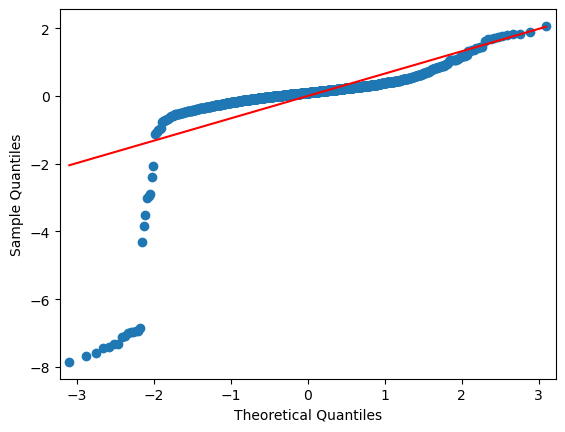

In [24]:
# Q-Q plot of the standardized residuals

statsmodels.graphics.gofplots.qqplot(df_comb['std_res_regr1'], line='r')
plt.show()

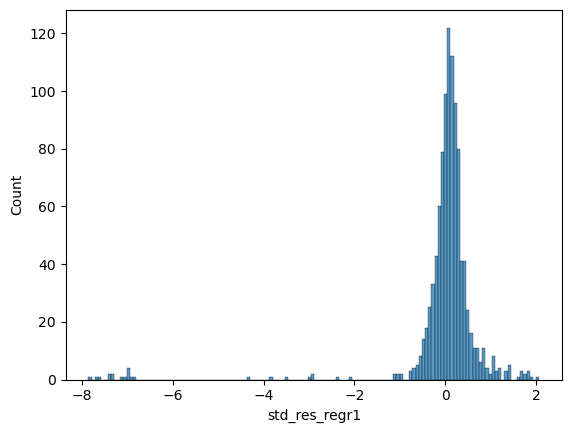

In [25]:
# Histogram of the standardized residuals

sns.histplot(df_comb['std_res_regr1'])
plt.show()

__Q18:__ Check the linearity, homoscedasticity and independence assumptions by assessing a plot that shows the fitted values on the X-axis and the standardized residuals on the Y-axis. (Hint: use Seaborn's `regplot()` function.)

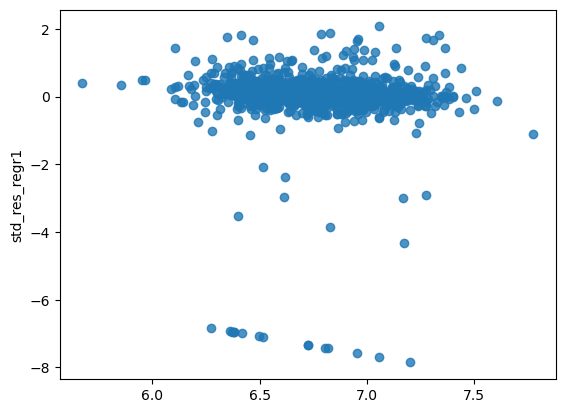

In [26]:
# Fitted values - standardized residuals plot

sns.regplot(x=regr1.fittedvalues, y=df_comb['std_res_regr1'], fit_reg=False)
plt.show()

__Q19:__ Assuming that you have found that the standardized residuals are not normally distributed and that this is mainly due to a number of (negative) outliers, create a new DataFrame ('df_comb_nw') by selecting all rows where the absolute value of the standardized residuals is smaller than 3, and display the resulting DataFrame.

In [27]:
# Remove outliers

df_comb_nw = df_comb[abs(df_comb['std_res_regr1']) <= 3]
df_comb_nw

,Ticker Symbol,ROA,Tobin_Q,Firm_size,Leverage,Sector,CEO_pay_ln,CEO_power,std_res_regr1
0,AIR,0.002116,0.906352,7.639642,0.329293,0,6.687235,1,0.025844
2,ABT,0.054311,2.797148,11.125600,0.281335,1,7.550135,4,0.430777
3,AMD,0.056569,9.432183,8.704171,0.120770,1,6.934827,2,0.292601
4,APD,0.092911,2.997998,9.849179,0.175581,1,7.208600,3,0.285882
5,ALK,0.059186,1.308031,9.472166,0.246825,0,6.371349,3,-0.464819
...,...,...,...,...,...,...,...,...,...
1032,LYB,0.111385,1.770919,10.323349,0.445244,1,7.362645,2,0.177538
1033,ALLE,0.135414,4.636576,7.995374,0.508594,1,6.895216,4,0.112506
1034,LPG,0.066892,0.680411,7.421752,0.395847,0,6.748173,4,0.190259
1035,NVT,0.047993,1.375650,8.442534,0.239855,1,6.775405,1,-0.119102


__Q20:__ Use statsmodels to analyze the following (cross-sectional) regression model ('regr2') on the 'df_comb_nw' DataFrame:

$$CEO\_pay\_ln = {\alpha} + {\beta}_{1}(CEO\_power) + {\beta}_{2}(ROA) + {\beta}_{3}(Tobin\_Q) + {\beta}_{4}(Firm\_size) + {\beta}_{5}(Leverage) + {\beta}_{6}(Sector) + {\epsilon}$$

In [28]:
# Estimate the 'regr2' regression model

regr2 = smf.ols(formula = 'CEO_pay_ln ~ CEO_power + ROA + Tobin_Q + Firm_size + Leverage + Sector', data=df_comb_nw).fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:             CEO_pay_ln   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     85.58
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.25e-86
Time:                        10:22:45   Log-Likelihood:                -409.04
No. Observations:                1012   AIC:                             832.1
Df Residuals:                    1005   BIC:                             866.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3580      0.078     69.066      0.0

__Q21:__ Use statsmodels to analyze the following (cross-sectional) regression model ('regr3') on the 'df_comb_nw' DataFrame:

$$CEO\_pay\_ln = {\alpha} + {\beta}_{1}(CEO\_power) + {\beta}_{2}(ROA) + {\beta}_{3}(Firm\_size) + {\beta}_{4}(Leverage) + {\beta}_{5}(Sector) + {\epsilon}$$

In [29]:
# Estimate the 'regr3' regression model

regr3 = smf.ols(formula = 'CEO_pay_ln ~ CEO_power + ROA + Firm_size + Leverage + Sector', data=df_comb_nw).fit()
print(regr3.summary())

                            OLS Regression Results                            
Dep. Variable:             CEO_pay_ln   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     102.7
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.28e-87
Time:                        10:22:45   Log-Likelihood:                -409.13
No. Observations:                1012   AIC:                             830.3
Df Residuals:                    1006   BIC:                             859.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3469      0.073     73.045      0.0

__Q22:__ Use statsmodels to analyze the following (cross-sectional) regression model ('regr4') on the 'df_comb_nw' DataFrame:

$$CEO\_pay\_ln = {\alpha} + {\beta}_{1}(CEO\_power) + {\beta}_{2}(Tobin\_Q) + {\beta}_{3}(Firm\_size) + {\beta}_{4}(Leverage) + {\beta}_{5}(Sector) + {\epsilon}$$

In [30]:
# Estimate the 'regr4' regression model

regr4 = smf.ols(formula = 'CEO_pay_ln ~ CEO_power + Tobin_Q + Firm_size + Leverage + Sector', data=df_comb_nw).fit()
print(regr4.summary())

                            OLS Regression Results                            
Dep. Variable:             CEO_pay_ln   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     102.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.17e-87
Time:                        10:22:45   Log-Likelihood:                -409.04
No. Observations:                1012   AIC:                             830.1
Df Residuals:                    1006   BIC:                             859.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3586      0.077     70.016      0.0

__Q23:__ Use statsmodels to create a table that shows the three regression models ('regr2', 'regr3' and 'regr4') next to each other, and display this table.

In [31]:
# Display table with the three regression models

from statsmodels.iolib.summary2 import summary_col

info_dict={'No. of observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[regr2, regr3, regr4],
                           float_format='%0.2f',
                           stars=True,
                           model_names=['Model 1',
                                       'Model 2',
                                       'Model 3'],
                           info_dict=info_dict,
                           regressor_order=['const',
                                           'CEO_power',
                                           'ROA',
                                           'Tobin_Q',
                                           'Firm_size',
                                           'Leverage',
                                           'Sector'])

results_table.add_title('Determinants of CEO compensation - OLS regressions')

print(results_table)

Determinants of CEO compensation - OLS regressions
                    Model 1 Model 2 Model 3
-------------------------------------------
CEO_power           0.04*** 0.04*** 0.04***
                    (0.01)  (0.01)  (0.01) 
ROA                 -0.01   -0.04          
                    (0.16)  (0.14)         
Tobin_Q             -0.00           -0.00  
                    (0.01)          (0.01) 
Firm_size           0.16*** 0.16*** 0.16***
                    (0.01)  (0.01)  (0.01) 
Leverage            0.23*** 0.23*** 0.23***
                    (0.05)  (0.05)  (0.05) 
Sector              0.06**  0.06**  0.06** 
                    (0.02)  (0.02)  (0.02) 
Intercept           5.36*** 5.35*** 5.36***
                    (0.08)  (0.07)  (0.08) 
R-squared           0.34    0.34    0.34   
R-squared Adj.      0.33    0.33    0.33   
No. of observations 1012    1012    1012   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
